# Problem Statement

### Predict Item Sales Price

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error as MAE


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [125]:
df=pd.read_csv("Train.csv")

In [126]:
df.shape

(8523, 12)

In [127]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [128]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

1. Item_Outlet_Sales is dependent varaible. Others are independent variables
2. No need to change any data type
3. Total Number of independent variables: 11
4. Categorical independent Variables: 7 variables -> Item_Identifier, Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
5.Continuous independent varaibles: 4 variables - > Item_Weight,
6. Model: Supervised Learning; As Target/Dependent varaible is continuous in nature, regression model is better suitable model.


| Column | Description|
|---|--|
|Item_Identifier | Unique Prodcut ID|
|Item_Weight  | Weight Of the product|
|Item_Fat_Content | Fat content in thhe product|
|Item_Visibility | %of total display are of the product|
|Item_Type | Category of product|
|Item_MRP  |Maximum retail price of the product|
|Outlet_Identifier| Unique Store ID|
|Outlet_Establishment_Year | Store Estabilishment Year|
|Outlet_Size| size of the store|
|Outlet_Location_Type  | Type of the city where store is located|
|Outlet_Type| Type of the outlet (super market or grocery store)|
|Item_Outlet_Sales|Sales of the product in the particular store|

In [129]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Hypothesis

1. Items sales increases with decrease in FAT content
2. MRP of the product affects te sales price for the particular product category
3. Size and city of the product affect the sales price of the item
4. Outlet type affect the sales of the product. 

# Missing Values

In [130]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


Missing Values in : Item_Weight, Outlet_Size

In [131]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [132]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

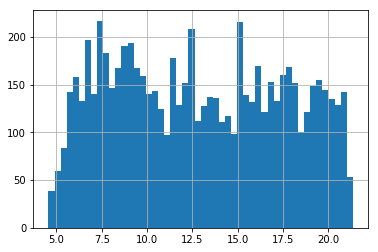

In [133]:
df['Item_Weight'].hist(bins=50)

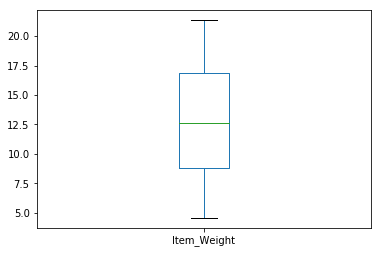

In [134]:
df['Item_Weight'].plot.box()

In [135]:
df['Item_Weight'].median()

12.6

In [136]:
df['Item_Weight'].mode()

0    12.15
dtype: float64

In [137]:
df['Item_Weight'].isnull().sum()

1463

In [138]:
#shuffle the dataset and split into train and test dataset

data=shuffle(df,random_state=42)
div=int(data.shape[0]/4)
train=data.iloc[:3*div+1,:]
test=data.iloc[3*div+1:,:]

In [139]:
train.shape

(6391, 12)

In [140]:
test.shape

(2132, 12)

In [141]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
train['simple_mean']=train['Item_Outlet_Sales'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
train['simple_mean']

7503    2154.479628
2957    2154.479628
7031    2154.479628
1084    2154.479628
856     2154.479628
4304    2154.479628
2132    2154.479628
1385    2154.479628
5239    2154.479628
6516    2154.479628
4509    2154.479628
1670    2154.479628
4313    2154.479628
1623    2154.479628
5220    2154.479628
6753    2154.479628
315     2154.479628
3524    2154.479628
7716    2154.479628
2083    2154.479628
4463    2154.479628
4411    2154.479628
2112    2154.479628
1057    2154.479628
868     2154.479628
700     2154.479628
6903    2154.479628
4087    2154.479628
4562    2154.479628
8222    2154.479628
           ...     
5833    2154.479628
2971    2154.479628
1082    2154.479628
2920    2154.479628
311     2154.479628
4644    2154.479628
661     2154.479628
1989    2154.479628
3665    2154.479628
306     2154.479628
2335    2154.479628
4790    2154.479628
2356    2154.479628
3702    2154.479628
3804    2154.479628
1927    2154.479628
7724    2154.479628
3427    2154.479628
749     2154.479628


In [144]:
simple_mean_error=MAE(train['simple_mean'],train['Item_Outlet_Sales'])
simple_mean_error

1333.0155548127382

In [145]:
out_type=pd.pivot_table(train, values='Item_Outlet_Sales', index='Outlet_Type',aggfunc=np.mean)
out_type

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.713738
Supermarket Type1,2269.172538
Supermarket Type2,1961.889047
Supermarket Type3,3735.211455


In [148]:
#separate features and target
features=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
target=data['Item_Outlet_Sales']

In [149]:
features.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [150]:
from sklearn.neighbors import KNeighborsRegressor


In [151]:
knn=KNeighborsRegressor()

In [152]:
knn.fit(features,target)

ValueError: could not convert string to float: 'Supermarket Type1'

In [153]:
features.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [154]:
features.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [155]:
features['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [156]:
mean_val=features['Item_Weight'].mean()
features['Item_Weight'].fillna(value=mean_val,inplace=True)

In [158]:
features['Item_Weight'].head(10)

0     9.300000
1     5.920000
2    17.500000
3    19.200000
4     8.930000
5    10.395000
6    13.650000
7    12.857645
8    16.200000
9    19.200000
Name: Item_Weight, dtype: float64

In [161]:
features['Outlet_Size'].mode()

0    Medium
dtype: object

In [162]:
features['Outlet_Size'].isnull().sum()

2410

In [163]:
mode_val=features['Outlet_Size'].mode()[0]
mode_val

'Medium'

In [164]:
features['Outlet_Size'].fillna(value=mode_val,inplace=True)

In [165]:
features['Outlet_Size'].isnull().sum()

0

## Handling Categorical Varaibles

In [166]:
features.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [167]:
features['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [168]:
pd.get_dummies(features['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [170]:
features=pd.get_dummies(features)

In [171]:
features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
knn.fit(features,target)